# Lecture 11: Linear algebra II

## Lecture overview

1. [Matrix operations](#section1)
2. [Solving systems of linear equations](#section2)

<span id='section1'></span>
## 1. Matrix operations
<hr>

### Trace

The **trace** of a matrix is the sum of the diagonal elements

$$
\mathrm{Tr}\left(
\begin{pmatrix}
  a & b & c \\
  d & e & f \\
  g & h & i \\
\end{pmatrix}\right)
=
a + e + i   
$$

### Determinant

The **determinant** of a $2 \times 2$ matrix is:

$$
\begin{equation*}
\text{Det}\left(
\begin{pmatrix}
  a & b \\
  c & d
\end{pmatrix}\right)
=
\begin{vmatrix}
  a & b\\
  c & d
\end{vmatrix}
=ad-bc
\end{equation*}
$$

!!! note

    You should remember how to calculate the determinant of a 2x2 matrix.

The **determinant** of an $n \times n$ matrix can be obtained by working along the first row, multiplying the first element of the first row by the determinant of the matrix created by deleting the first row and first column *minus* the second element of the first row times the determinant of the matrix created by deleting the first row and second column *plus* the third element... and so on

$$
\begin{vmatrix}
\mathbf{M}
\end{vmatrix}
= \sum_{j=1}^n (-1)^{j+1} m_{1j}
\begin{vmatrix}
\mathbf{M}_{1j}
\end{vmatrix}
$$

where $m_{ij}$ is the element in the $i^{\mathrm{th}}$ row and $j^{\mathrm{th}}$ column and $\mathbf{M}_{ij}$ is the matrix $\mathbf{M}$ with the $i^{\mathrm{th}}$ row and the $j^{\mathrm{th}}$ column deleted.

More generally, we can move along any row $i$

$$
|\mathbf{M}| = (-1)^{i+1}\sum_{j=1}^{n}(-1)^{j+1}m_{ij}  |\mathbf{M_{ij}}|
$$

or any column $j$

$$
|\mathbf{M}| = (-1)^{j+1}\sum_{i=1}^{n}(-1)^{i+1}m_{ij}  |\mathbf{M_{ij}}|
$$

A few useful rules emerge from this:

- The determinant of a matrix is the same as the determinant of its transpose, $|\mathbf{M}| = |\mathbf{M}^\intercal|$
- The determinant of a diagonal or triangular matrix is the product of the diagonal elements, $|\mathbf{M}| = \prod_{i=1}^n m_{ii} = m_{11}m_{22}\cdots m_{nn}$
- The determinant of a block-diagonal or -triangular matrix is the product of the determinants of the diagonal submatrices

It also suggests that rows or columns with lots of zeros are very helpful when calculating the determinant, for example

$$
\begin{aligned}
\begin{vmatrix}
  m_{11} & 0 & 0 \\
  m_{21} & m_{22} & m_{23} \\
  m_{31} & m_{32} & m_{33} \\
\end{vmatrix}
= 
m_{11} 
\begin{vmatrix}
  m_{22} & m_{23} \\
  m_{32} & m_{33} \\
\end{vmatrix}\\
\end{aligned}
$$

And why would we want to calculate the determinant of a matrix? 

Well, when the determinant is zero, $|\mathbf{M}|=0$, it means that the rows are not linearly independent, that is, some row $\vec{r}_k$ can be written as $a_1 \vec{r}_1 + \cdots + a_{k-1} \vec{r}_{k-1} + a_{k+1} \vec{r}_{k+1} + \cdots + a_n \vec{r}_n$, where the $a_i$ are scalars. 

As a result, when we multiply a vector by a matrix with a determinant of zero we lose some information, and therefore cannot reverse the operation (as we will see when we discuss **inverses**). This is analagous to mutliplying by 0 in normal algebra -- if we multiply a bunch of different numbers by zero we have no way of knowing what the original numbers were.

Geometrically, mutliplying multiple vectors by a matrix whose deteriminant is zero causes them to fall along a line. Below we multiply the two black vectors by a matrix whose determinant is zero to get the two red vectors, which line on the same line.

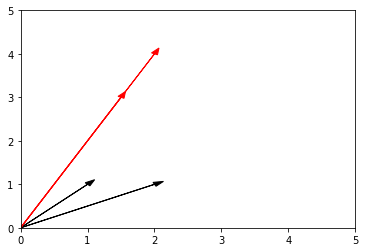

In [30]:
matplotlib.pyplot as plt #import plotting library
from sympy import *

v1 = Matrix([[2],[1]]) #column vector 1
v2 = Matrix([[1],[1]]) #column vector 2
M = Matrix([[1/2,1],[1,2]]) #matrix with determinant of zero

#original vectors
for v in [v1,v2]:
    plt.arrow(0, 0, #starting x and y values of arrow
              float(v[0]), float(v[1]), #change in x and y 
              head_width=0.1, color='black') #aesthetics

#stretched and rotated vectors
for v in [M*v1,M*v2]:
    plt.arrow(0, 0, #starting x and y values of arrow
              float(v[0]), float(v[1]), #change in x and y 
              head_width=0.1, color='red') #aesthetics

plt.xlim(0,5) #set bounds on x axis
plt.ylim(0,5) #set bounds on y axis
plt.show()

### Inverse

In the last lecture we discussed matrix addition/subtraction and multiplication. We did not yet discuss division. In fact, for matrices, there is no such thing as division! The analogy is the **inverse**.

A square $m\times m$ matrix $\mathbf{M}$ is **invertible** if it may be multiplied by another matrix to get the identity matrix.  We call this second matrix, $\mathbf{M}^{-1}$ the **inverse** of the first

$$
\mathbf{M}\mathbf{M}^{-1} = \mathbf{I} = \mathbf{M}^{-1}\mathbf{M}
$$

Geometrically, the inverse reverses the stretching and rotating that the original matrix does to a vector

$$\mathbf{M}^{-1}(\mathbf{M}\vec{v}) = (\mathbf{M}^{-1}\mathbf{M})\vec{v} = \mathbf{I}\vec{v} = \vec{v}$$

There are rules to find the inverse of a matrix (when it is invertible). For a 2x2 matrix we do the following

$$
\begin{align}
\mathbf{M}^{-1} 
=&\begin{pmatrix}
  a & b \\
  c & d
\end{pmatrix}^{-1}\\
&=\frac{1}{\mathrm{Det}(\mathbf{M})}
\begin{pmatrix}
  d  & -b \\
  -c & a
\end{pmatrix}\\
&=
\begin{pmatrix}
  \frac{d}{ad-bc}  & \frac{-b}{ad-bc} \\
  \frac{-c}{ad-bc} & \frac{a}{ad-bc}
\end{pmatrix}
\end{align}
$$

!!! note

    Remember how to take the inverse of a 2x2 matrix.

!!! warning

    As you can see from the 2x2 case above, when the determinant is zero no inverse exists (and this is true for any square matrix). We therefore call a matrix whose determinant is zero **non-invertible** or **singular**. You can connect this fact back to the previous lecture, where we saw that mutliplying vectors by a matrix whose determinant is zero caused them to collapse upon one another, losing information. The fact that a matrix whose determinant is zero has no inverse means that we cannot reverse the original matrix multiplication, just like we can't reverse mutliplication by zero in normal algebra.

Larger matrices are more difficult to invert, except if they are diagonal, in which case we simply invert each of the diagonal elements

$$
\mathbf{M}^{-1} = 
\begin{pmatrix}
1/m_{11} & 0 & \cdots & 0\\
0 & 1/m_{22} & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots\\
0 & 0 & \cdots & 1/m_{nn}\\
\end{pmatrix}
$$

<span id='section2'></span>
## 2. Solving systems of linear equations
<hr>

With all this linear algebra knowledge in hand, let's use it!
  
Let's return to our model for the number of birds on two islands

<center>
```mermaid
graph LR;
    A1((n1)) --b1 n1--> A1;
    B1[ ] --m1--> A1;
    A1 --d1 n1--> C1[ ];

    A2((n2)) --b2 n2--> A2;
    B2[ ] --m2--> A2;
    A2 --d2 n2--> C2[ ];

    A1 --m12 n1--> A2;
    A2 --m21 n2--> A1;

    style B1 height:0px;
    style C1 height:0px;
    style B2 height:0px;
    style C2 height:0px;
```   
</center>

$$
\begin{aligned}
\begin{pmatrix} \frac{\mathrm{d}n_1}{\mathrm{d}t} \\ \frac{\mathrm{d}n_2}{\mathrm{d}t} \end{pmatrix} 
&= \begin{pmatrix} b_1 - d_1 - m_{12} & m_{21} \\ m_{12} & b_2 - d_2 - m_{21} \end{pmatrix}
\begin{pmatrix} n_1 \\ n_2 \end{pmatrix} 
+ \begin{pmatrix} m_1 \\ m_2 \end{pmatrix}\\
\frac{\mathrm{d}\vec{n}}{\mathrm{d}t} &= \mathbf{M}\vec{n} + \vec{m}
\end{aligned}
$$

The equilibria, $\hat{\vec{n}}$, are then found by setting $\frac{\mathrm{d}\vec{n}}{\mathrm{d}t}=0$, subtracting $\vec{m}$ from both sides, and multiplying by the inverse matrix $\mathbf{M}^{-1}$ on the left

$$
\begin{align*}
0 &= \mathbf{M}\hat{\vec{n}} + \vec{m}\\
-\vec{m} &= \mathbf{M}\hat{\vec{n}}\\
-\mathbf{M}^{-1}\vec{m} &= \mathbf{M}^{-1}\mathbf{M}\hat{\vec{n}}\\
-\mathbf{M}^{-1}\vec{m} &= \hat{\vec{n}}
\end{align*}
$$

We can write the left hand side in terms of our parameters by calculating the inverse of this 2x2 matrix and multiplying by the vector

$$
\begin{align}
\hat{\vec{n}} 
&=-\mathbf{M}^{-1}\vec{m}\\
&=-\frac{1}{|\mathbf{M}|}
\begin{pmatrix} b_2 - d_2 - m_{21} & -m_{21} \\ -m_{12} & b_1 - d_1 - m_{12} \end{pmatrix}
\begin{pmatrix} m_1 \\ m_2 \end{pmatrix}\\
&= -\frac{1}{(b_1 - d_1 - m_{12})(b_2 - d_2 - m_{21})-m_{21}m_{12}} \begin{pmatrix} (b_2 - d_2 - m_{21})m_1 -m_{21}m_2 \\ -m_{12}m_1 + (b_1 - d_1 - m_{12})m_2 \end{pmatrix}\\
&= \begin{pmatrix} -\frac{(b_2 - d_2 - m_{21})m_1 -m_{21}m_2}{(b_1 - d_1 - m_{12})(b_2 - d_2 - m_{21})-m_{21}m_{12}} \\ -\frac{-m_{12}m_1 + (b_1 - d_1 - m_{12})m_2}{(b_1 - d_1 - m_{12})(b_2 - d_2 - m_{21})-m_{21}m_{12}} \end{pmatrix}
\end{align}
$$

Ta-da! Using linear algebra we solved for both equilibria, $\hat{n}_1$ and $\hat{n}_2$, with a single equation. In future lectures we'll see how we can use linear algebra to calculate the local stability and derive general solutions.